# 2. Machine Learning for Regression

In [3]:
import pandas as pd
import numpy as np




## Data preparation

In [4]:
df=pd.read_csv("data/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns= df.columns.str.lower().str.replace(" ","_")

In [6]:
strings=list(df.dtypes[df.dtypes=="object"].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ","_")

In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## 2.3 Exploratory data analysis

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: xlabel='msrp', ylabel='Count'>

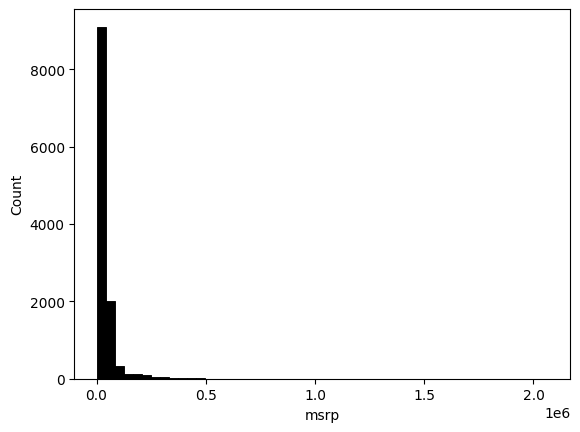

In [10]:
# plt.figure(figsize=(6, 4))

sns.histplot(df["msrp"], bins=50, color='black', alpha=1)
# plt.ylabel('Frequency')
# plt.xlabel('Price')
# plt.title('Distribution of prices')

# plt.show()


<Axes: xlabel='msrp', ylabel='Count'>

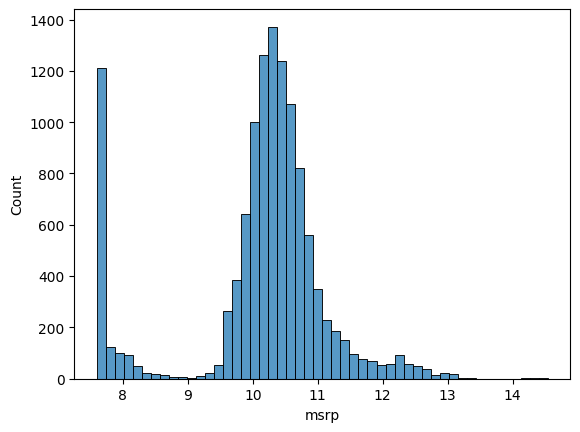

In [11]:
price_logs = np.log1p(df["msrp"])
sns.histplot(price_logs,bins=50)

In [12]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 setting up the validation framework

In [14]:
n=len(df)
n_val = int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test

In [16]:
df_val=df.iloc[n_train:]
df_test=df.iloc[n_train:n_train+n_val]
df_train = df.iloc[n_train+n_val:]

In [18]:
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
